<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Comparacao_MP_com_valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'> Comparação de Máquinas Preditivas - Com ou Sem validação Cruzada </font>
![](https://images.squarespace-cdn.com/content/v1/5feb53185d3dab691b47361b/1609930650139-9NRI63XUJ29Y7E9LEA9G/12eca-machine-learning.gif)

# 1° Importação de Pacotes

In [1]:
# Comparação de vários algoritmos com e sem validação cruzada
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #avalidação da máquina preditiva com validação cruzada
from sklearn.model_selection import StratifiedKFold #função para fatiar o dataset com validação cruzada
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
cabeçalho = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=cabeçalho)

In [8]:
# shape
print(dataset.shape)

(150, 5)


In [9]:
# head
print(dataset.head(25))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [10]:
# descriptions
print(dataset.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [16]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


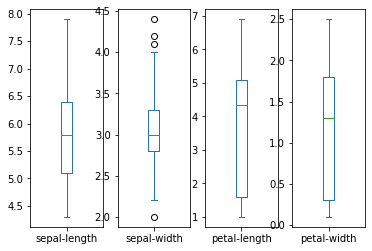

In [34]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

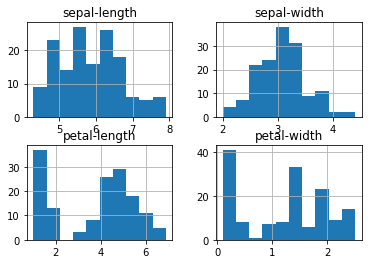

In [42]:
# histograms
dataset.hist()
pyplot.show()

In [43]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
# Criar uma Lista de Algoritmos a serem utilizados
models = []

# Fazer um append (acrescentar) na lista 'models' 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))


In [47]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('DT', DecisionTreeClassifier()),
 ('GBM', GradientBoostingClassifier()),
 ('ET', ExtraTreesClassifier()),
 ('RF', RandomForestClassifier()),
 ('XGB', XGBClassifier())]

In [ ]:
# Make predictions on validation dataset
#model = SVC(gamma='auto')
#model.fit(X_train, Y_train)
#predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

In [52]:

# evaluate each model in turn
names = []
resultado = []

for name, model in models:

	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
 
	resultado.append(cv_results)
 
	names.append(name)
 
	print('%s: %f (%f)' % (name, cv_results.mean()*100, cv_results.std()*100))
 


LR: 96.000000 (4.422166)
LDA: 98.000000 (3.055050)
KNN: 96.666667 (3.333333)
CART: 94.666667 (6.531973)
NB: 96.000000 (4.422166)
SVM: 97.333333 (3.265986)
DT: 94.666667 (6.531973)
GBM: 95.333333 (5.206833)
ET: 95.333333 (5.206833)
RF: 94.000000 (6.960204)
XGB: 94.666667 (4.988877)


In [57]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
#model = SVC(gamma='auto')
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

